<a href="https://colab.research.google.com/github/steimel60/ML/blob/main/DeepLearning/PetBreeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 719 kB 4.8 MB/s 
     |████████████████████████████████| 4.2 MB 13.2 MB/s 
     |████████████████████████████████| 197 kB 63.3 MB/s 
     |████████████████████████████████| 1.2 MB 48.3 MB/s 
     |████████████████████████████████| 346 kB 61.9 MB/s 
     |████████████████████████████████| 59 kB 8.1 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 86 kB 7.8 MB/s 
     |████████████████████████████████| 212 kB 25.3 MB/s 
     |████████████████████████████████| 140 kB 70.7 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 596 kB 56.4 MB/s 
     |████████████████████████████████| 127 kB 58.2 MB/s 
     |████████████████████████████████| 271 kB 62.8 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 66.6 MB/s 
     |████████████████████████████████| 6.6 MB 45.0 MB/s 
ERROR: pip's dependency

In [3]:
#Load Data
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

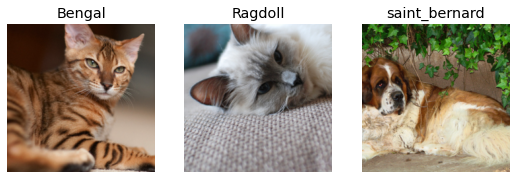

In [5]:
#We aren't doing localization so we can ignore annotations
fname = (path/"images").ls()[0]
#Use regex to label dataset
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),  #Types of data
                 get_items = get_image_files, #How to get items
                 splitter = RandomSplitter(seed=42),  #Split into train and test sets
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),  #Get labels
                 item_tfms = Resize(460), #presizing, resize image larger than final target to help avoid data loss
                 batch_tfms = aug_transforms(size=224, min_scale=.75)) #set final soze smaller than presize and do aug transforms
dls = pets.dataloaders(path/"images") #load with above settings

#Check our data
dls.show_batch(nrows=1, ncols=3)

In [ ]:
#Make a simple model
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.540608,0.309086,0.102165,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.497012,0.368240,0.112314,01:20
